In [260]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib
import os

In [261]:
DATA_PATH = os.path.join("datasets", "titanic")
train_data = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
test_data = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))

In [262]:
def remove_cols(args, data):
    for arg in args:
        data = data.drop(arg, axis=1)
    return data        

In [263]:
train_data = remove_cols(['Name', 'Ticket'], train_data.copy())
train_data = train_data.set_index('PassengerId')

In [264]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [265]:
train_set = train_data.drop('Survived', axis=1)
train_labels = train_data['Survived'].copy()

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

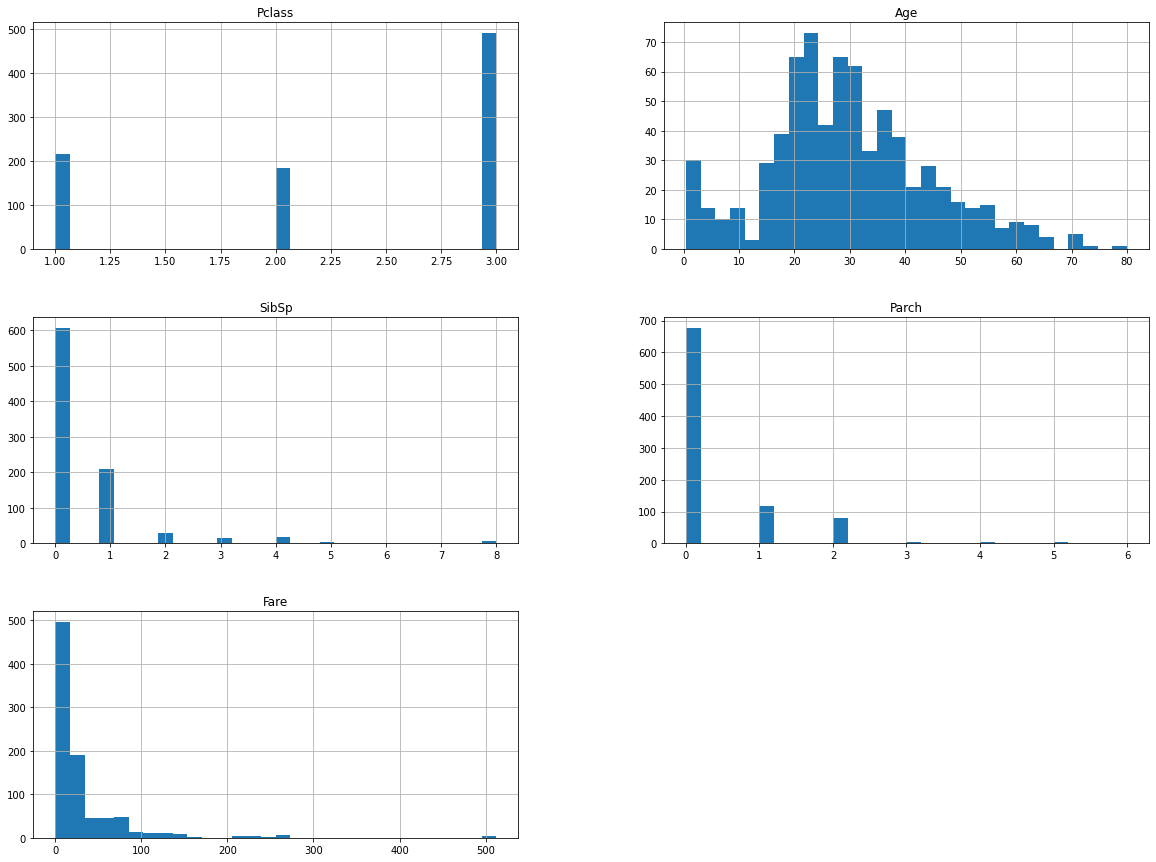

In [266]:
train_set.hist(bins=30, figsize=(20,15))

In [267]:
train_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,NaN,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,NaN,S
888,1,female,19.0,0,0,30.0000,B42,S
889,3,female,NaN,1,2,23.4500,NaN,S


In [268]:
train_num_attrs = train_set.copy()\
.drop('Sex', axis=1).drop('SibSp', axis=1).drop('Parch', axis=1)\
.drop('Cabin', axis=1).drop('Embarked', axis=1).drop('Pclass', axis=1)
train_num_attrs

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500
...,...,...
887,27.0,13.0000
888,19.0,30.0000
889,NaN,23.4500


In [269]:
train_cat_attrs = train_set.copy().drop('Fare', axis=1).drop('Age', axis=1)
train_cat_attrs

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
PassengerId,,,,,,
1,3,male,1,0,NaN,S
2,1,female,1,0,C85,C
3,3,female,0,0,NaN,S
4,1,female,1,0,C123,S
5,3,male,0,0,NaN,S
...,...,...,...,...,...,...
887,2,male,0,0,NaN,S
888,1,female,0,0,B42,S
889,3,female,1,2,NaN,S


In [270]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

train_num_prep = num_pipeline.fit_transform(train_num_attrs)

In [271]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='f')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore')),
])

train_cat_prep = cat_pipeline.fit_transform(train_cat_attrs)

In [272]:
train_cat_prep.toarray()[0]

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0.])

In [273]:
num_attribs = list(train_num_attrs)
cat_attribs = list(train_cat_attrs)
print(cat_attribs)
print(num_attribs)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_prep = full_pipeline.fit_transform(train_set)
train_prep.shape #verify data shape

['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']
['Age', 'Fare']


(891, 173)

In [274]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_prep, train_labels)

SVC()

In [275]:
some_data = train_set.iloc[:10]
some_labels = train_labels.iloc[:10]
some_data_prep = full_pipeline.transform(some_data)
print('predictions:',svm_clf.predict(some_data_prep))
print('labels:', list(some_labels))
#looks good

predictions: [0 1 1 1 0 0 0 0 0 1]
labels: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


In [276]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cv_accuracy = cross_val_score(svm_clf, train_prep, train_labels, cv=5, scoring='accuracy')
y_train_pred = cross_val_predict(svm_clf, train_prep, train_labels, cv=5)

In [277]:
cv_accuracy

array([0.83798883, 0.81460674, 0.81460674, 0.79775281, 0.84831461])

precision:  0.8194444444444444
recall:  0.6900584795321637
F1:  0.7492063492063492


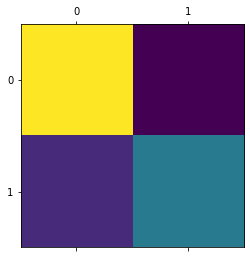

In [278]:
print('precision: ',precision_score(train_labels, y_train_pred))
print('recall: ',recall_score(train_labels, y_train_pred))
print('F1: ',f1_score(train_labels, y_train_pred))

conf_mx = confusion_matrix(train_labels, y_train_pred)
plt.matshow(conf_mx)
plt.show()

In [258]:
test_data = remove_cols(['Name', 'Ticket'], test_data.copy())
test_set = test_data.set_index('PassengerId')

In [279]:
test_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q
893,3,female,47.0,1,0,7.0000,NaN,S
894,2,male,62.0,0,0,9.6875,NaN,Q
895,3,male,27.0,0,0,8.6625,NaN,S
896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,NaN,S
1306,1,female,39.0,0,0,108.9000,C105,C
1307,3,male,38.5,0,0,7.2500,NaN,S


In [281]:
test_set_prep = full_pipeline.transform(test_set)
predictions = svm_clf.predict(test_set_prep)

In [323]:
preds_df = pd.DataFrame(predictions, columns=['Survived'])
ids_df = pd.DataFrame(test_set.index)

preds_df.index = np.arange(892, 892 + len(ids_df))
preds_df.index.names = ['PassengerId']
preds_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [325]:
preds_df.to_csv('predictions.csv')

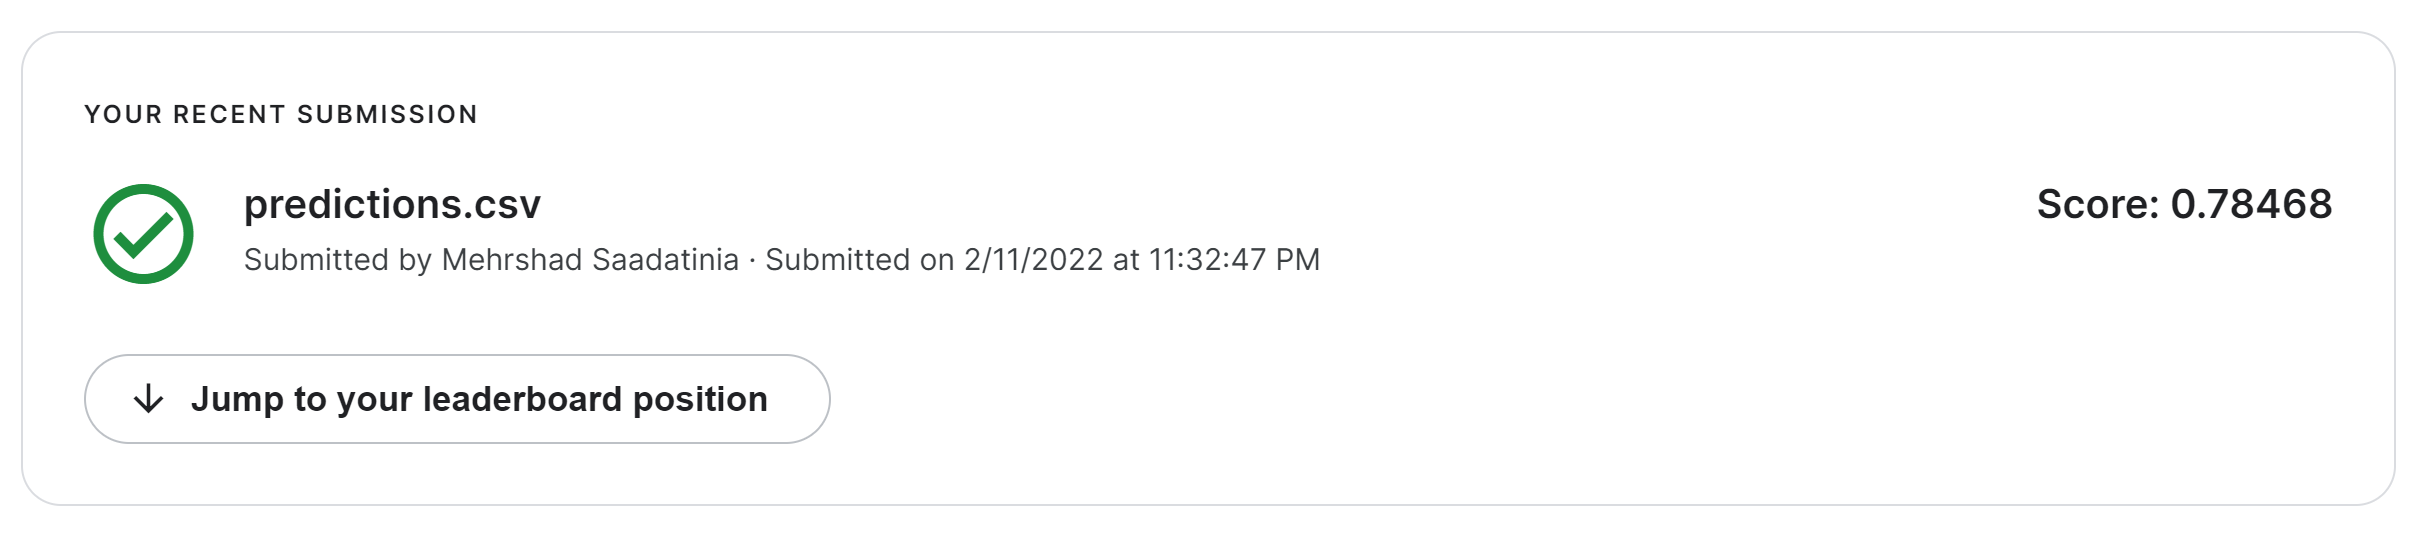